# Controller for the locking of the laser

In [98]:
%load_ext autoreload
%autoreload 2

from GettingStarted_lib.Interface import Interface
from GettingStarted_lib.LaserLockingController import LaserLockingController
import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Creating the interface:

It contains everything is needed for the comunications with the linien server in the RedPitaya.
- connection to the board;
- Initialization of the parameters;
- Parameters modification.

In [99]:
RP_Interface = Interface()
RP_Locking_Controller = LaserLockingController(RP_Interface)

2025-12-16 08:33:57 - Interface - INFO - Configuration loaded from /home/bec3/Desktop/Simone_Damian/Serafini/GettingStarted_lib/connect_config.yaml:



2025-12-16 08:33:57 - Interface - INFO - Attempting connection via RedPitaya_K address (192.168.1.159:18862)


linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       ERROR    Server is not running. Launching it!


2.1.0


linien_client.deploy           DEBUG    Sending credentials
linien_client.deploy           DEBUG    Starting server


linien_server.cli              DEBUG    Copied linien-server.service to /etc/systemd/system
linien_server.cli              INFO     Starting Linien server
linien_server.cli              INFO     Started Linien server


linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still

2025-12-16 08:34:26 - Interface - INFO - Connected to device via RedPitaya_K address
2025-12-16 08:34:27 - DataHandler - INFO - All reference lines loaded successfully.
2025-12-16 08:34:27 - LaserLockingController - INFO - LaserLockController initialized successfully.


In [59]:
pprint.pprint(vars(RP_Interface))

RP_Interface.client.parameters.check_for_changed_parameters()
params = RP_Interface.client.parameters
for name, param in vars(params).items():
    # Only pick those attributes that are actual Linien parameters
    if hasattr(param, "value"):
        print(f"{name}: {param.value}")

{'DEVICES': {'RedPitaya_K': {'ip': '192.168.1.159',
                             'linien_port': 18862,
                             'ssh_port': 22}},
 'PASSWORD': 'root',
 'USERNAME': 'root',
 'client': <linien_client.connection.LinienClient object at 0x7078b400df30>,
 'device': Device(key='dhmtcalcvf',
                  name='',
                  host='192.168.1.159',
                  port=18862,
                  username='root',
                  password='root',
                  parameters={}),
 'logger': <Logger Interface (INFO)>,
 'readable_params': {'control_signal_history': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffea40>,
                     'monitor_signal_history': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffc1f0>,
                     'sweep_signal': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffdc00>},
 'writeable_params': {'big_offset': <GettingStarted_lib.Interface.WriteableParameter object at 0x70

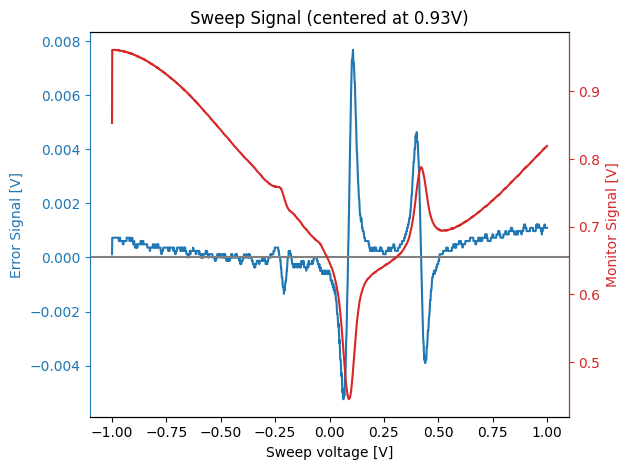

In [101]:
RP_Interface.plot_sweep()

In [225]:
RP_Interface.adjust_vertical_offset()

Actual offset_a: 0.0
New offset_a set to: 5.0


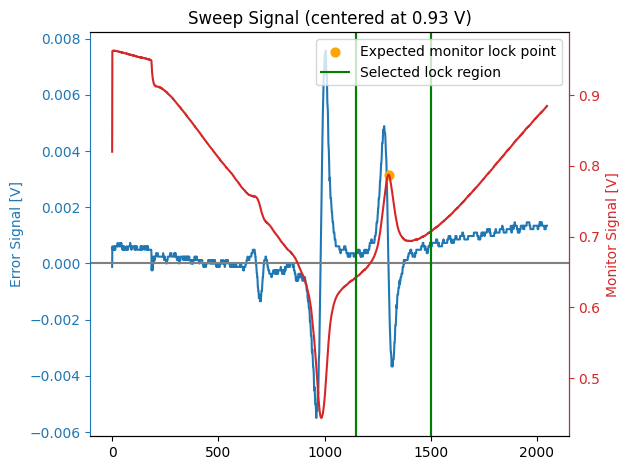

checking lock status...
checking lock status...
checking lock status...
checking lock status...
checking lock status...
Locking the laser worked! \o/
2025-12-15 15:57:58 - UnlockEventsLogger - INFO - Laser locked at time: 2025-12-15 15:57:58


In [72]:
RP_Interface.start_sweep()
RP_Locking_Controller.start_manual_locking()

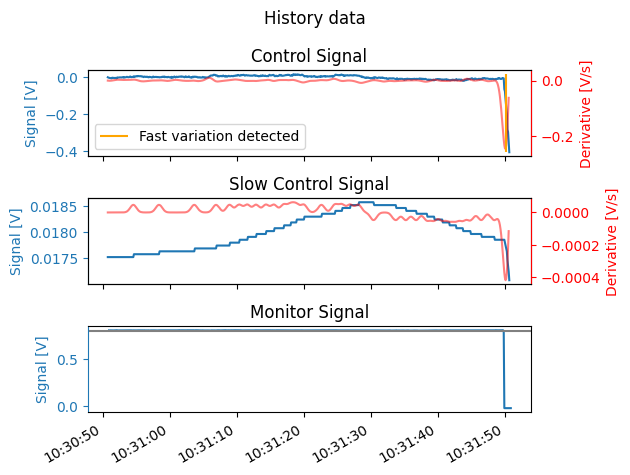

Laser lost locking
Trying to center the line looking at the slow control signal...


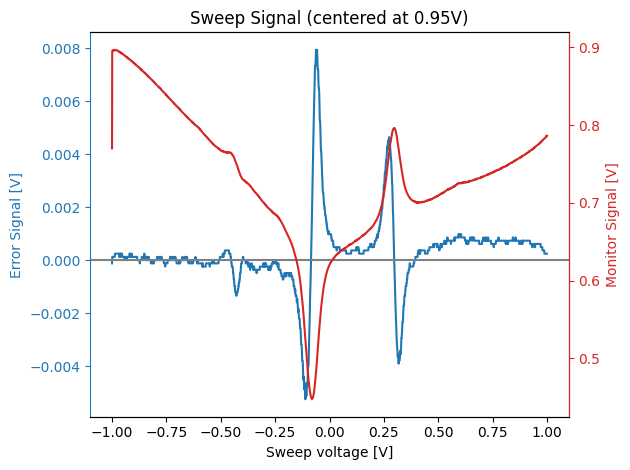

In [120]:
RP_Locking_Controller.start_locking_monitor()

In [124]:
RP_Interface.start_sweep()

2025-12-16 10:21:54 - LaserLockingController - INFO - Starting scan from 0.9V to 1.0V with 10 points.
2025-12-16 10:21:54 - LaserLockingController - DEBUG - Setting voltage to 0.9V
2025-12-16 10:21:54 - LaserLockingController - DEBUG - getting sweep signal
Scanning at voltage 0.900V (1/10) [#---------] (2.22s)2025-12-16 10:21:56 - LaserLockingController - DEBUG - Setting voltage to 0.9111111111111111V
2025-12-16 10:21:56 - LaserLockingController - DEBUG - getting sweep signal
Scanning at voltage 0.911V (2/10) [##--------] (4.13s)2025-12-16 10:21:58 - LaserLockingController - DEBUG - Setting voltage to 0.9222222222222223V
2025-12-16 10:21:58 - LaserLockingController - DEBUG - getting sweep signal
Scanning at voltage 0.922V (3/10) [###-------] (6.51s)2025-12-16 10:22:00 - LaserLockingController - DEBUG - Setting voltage to 0.9333333333333333V
2025-12-16 10:22:00 - LaserLockingController - DEBUG - getting sweep signal
Scanning at voltage 0.933V (4/10) [####------] (8.44s)2025-12-16 10:22:

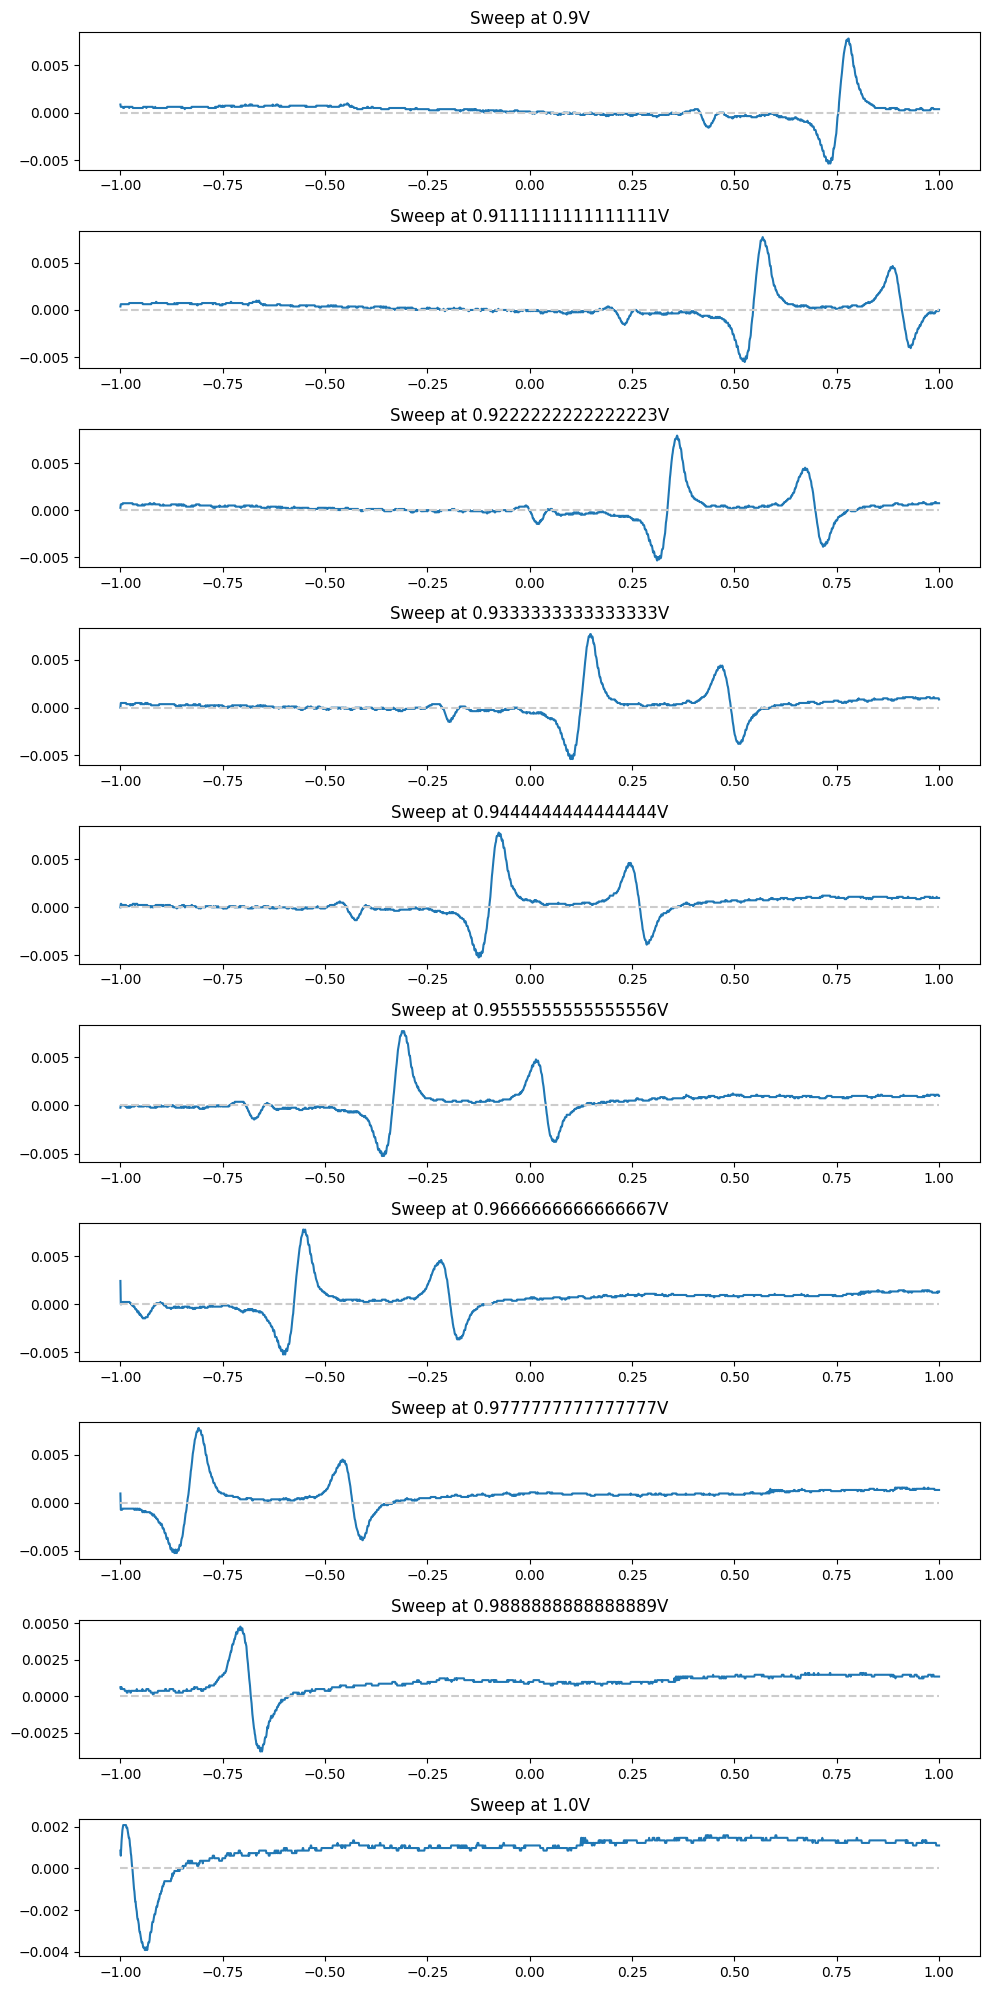

In [113]:
RP_Locking_Controller.scan(0.9, 1.0, 10)

2025-12-16 10:23:08 - LaserLockingController - INFO - Saving reference line with key K_D2.


2025-12-16 10:23:08 - DataHandler - INFO - Saved reference line: REFERENCE_LINE_K_D2.npy
2025-12-16 10:23:08 - DataHandler - INFO - All reference lines loaded successfully.


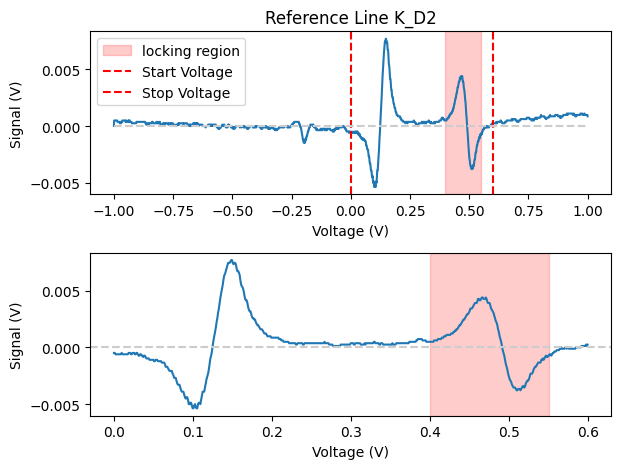

2025-12-16 10:23:09 - LaserLockingController - INFO - Reference line K_D2 saved successfully.


In [115]:
RP_Locking_Controller.save_reference_line(key = 'K_D2', V_scan = 0.933, start_voltage=0, stop_voltage=0.6, V_lock_start = 0.4, V_lock_end = 0.55, offset=0)

2025-12-16 10:25:00 - LaserLockingController - INFO - Finding reference lines.
2025-12-16 10:25:00 - LaserLockingController - DEBUG - Setting voltage to 0.92V


2025-12-16 10:25:01 - LaserLockingController - DEBUG - Correlation with LINE_K_D2 at 0.92V: 0.9858746019374627, Length of match: 0.9983713355048861, offset with respect to the reference signal: 9.436425043745061e-05
Scanning at voltage 0.920V (1/3) [###-------] (1.88s)2025-12-16 10:25:01 - LaserLockingController - DEBUG - Setting voltage to 0.935V
2025-12-16 10:25:04 - LaserLockingController - DEBUG - Correlation with LINE_K_D2 at 0.935V: 0.9870562678626587, Length of match: 0.9967426710097725, offset with respect to the reference signal: 2.8606100817228132e-05
Scanning at voltage 0.935V (2/3) [#######---] (4.16s)2025-12-16 10:25:04 - LaserLockingController - DEBUG - Setting voltage to 0.95V
2025-12-16 10:25:06 - LaserLockingController - DEBUG - Correlation with LINE_K_D2 at 0.95V: 0.9658475375233171, Length of match: 0.9967426710097722, offset with respect to the reference signal: 7.36475674654965e-05
Scanning at voltage 0.950V (3/3) [##########] (6.03s) Done!
2025-12-16 10:25:06 - La

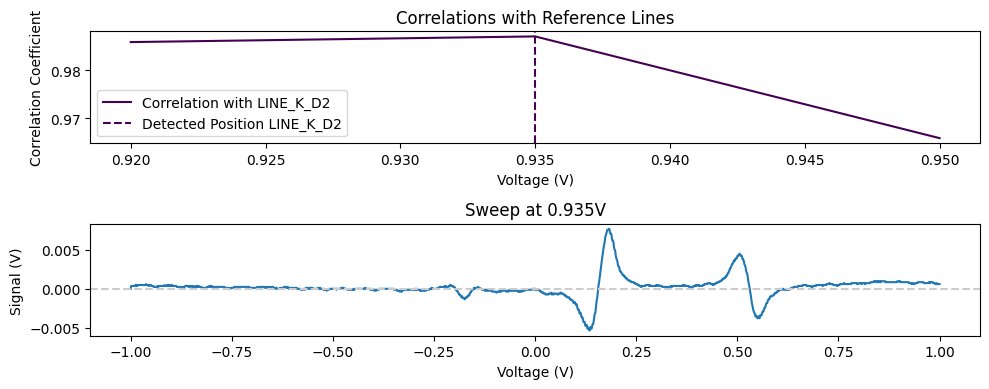

2025-12-16 10:25:06 - LaserLockingController - INFO - Reference lines found successfully.


In [118]:
RP_Locking_Controller.find_reference_lines(start_voltage = 0.92, stop_voltage = 0.95, num_points = 3)

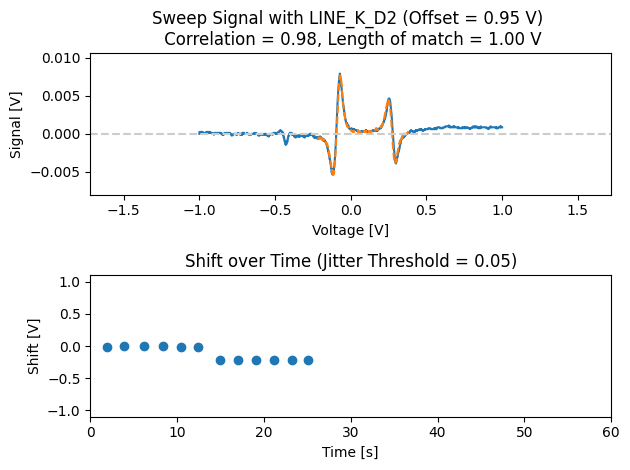

2025-12-16 10:25:45 - LaserLockingController - DEBUG - Frequency stable enough
2025-12-16 10:25:45 - LaserLockingController - INFO - Line LINE_K_D2 is centered at offset 0.9450000000000001.
2025-12-16 10:25:45 - LaserLockingController - DEBUG - Starting autolock between indices 1210 and 1363.
2025-12-16 10:25:45 - LaserLockingController - DEBUG - First 10 values of sweep signal raw: [0. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
Started autolock
checking lock status...
checking lock status...
checking lock status...
checking lock status...
2025-12-16 10:25:48 - LaserLockingController - INFO - Locking the laser worked \o/
2025-12-16 10:25:48 - LaserLockingController - INFO - Exiting centering and locking procedure.


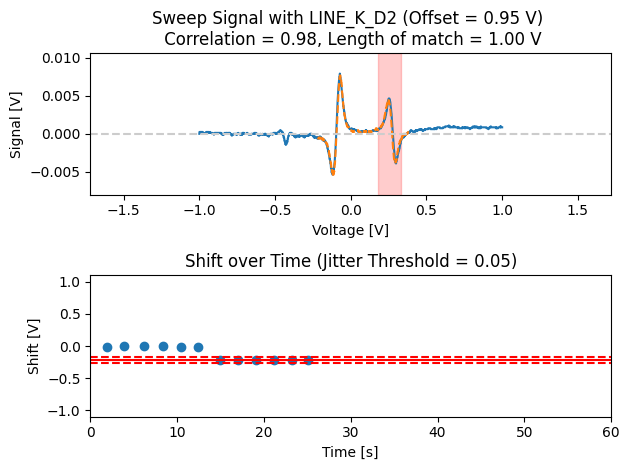

In [ ]:
RP_Locking_Controller.center_and_lock_v1('LINE_K_D2')

In [125]:
RP_Locking_Controller.unset_debug_mode()

KeyboardInterrupt: 

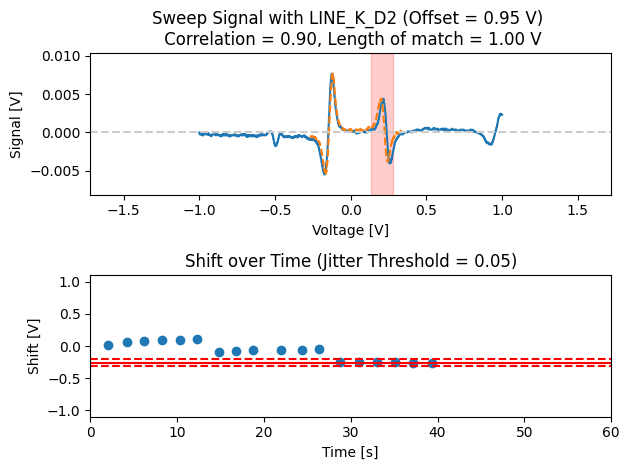

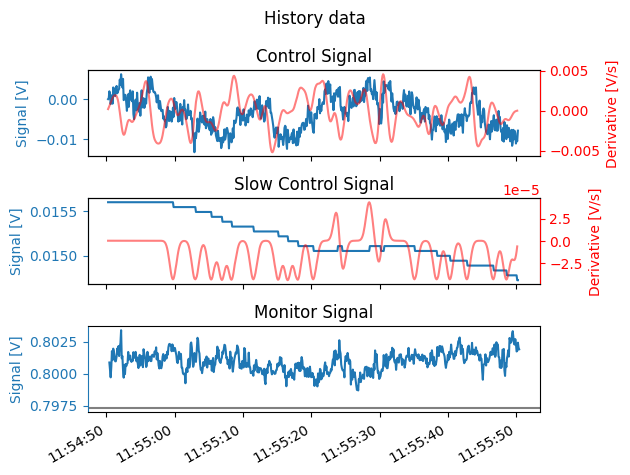

In [126]:
RP_Locking_Controller.automatic_lock_relock('LINE_K_D2')

## Analog out test

In [32]:
RP_Interface.check_for_changed_parameters()
RP_Interface.get_remote_value('big_offset')
RP_Interface.get_remote_value('offset_a')

0.0

In [59]:
RP_Interface.set_value('big_offset', 0.93)